Chapter 14. BFS and Graph Theory

# 适用问题
1. 分层遍历
   - 一层一层的遍历一个图、树、矩阵
   - 简单图的最短路径 Simple Graph Shortest Path
2. 连通块问题
   - 通过图中一个点找到其他所有联通的点
   - 找到所有方案问题中的一种非递归的实现方式
3. 拓扑排序
   - 求任意拓扑序
   - 求是否有拓扑序
   - 求字典序的最小拓扑徐
   - 求是否唯一拓扑序
   
# BFS的三种实现方法 (differentiate levels)
1. 单队列
2. 双队列
3. DummyNode

       1        | 1, ..
      / \       | 1, 2, 3 ..
     2   3      | 2, 3 ..
    / \  /
   4  5  6
        / \
       7   8

In [ ]:
# 单队列

# [69] Binary Tree Level Order Traversal
# Example 1:
# Input: {1, 2, 3}
# Output: [[1], [2,3]]
# Explanation:
#    1
#   / \
#  2   3
# it will be serialized {1, 2, 3}
import collections
class Solution:
    def level_order(self, root):
        if not root:
            return []
        
        # step 1. 把第一层的节点放到队列当中
        queue = collections.deque([root])
        results = []

        # step 2. while 队列非空
        while queue:
            results.append([node.val for node in queue])
            
            # step 3. 把上一层的节点, 拓展出下一层的节点
            for _ in range(len(queue)):
                node = queue.popleft()
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        return results


In [ ]:
# 交替双队列
#
#        1        Q1 | 1, ..
#       / \       
#      2   3      Q2 | 2, 3 ..
#     / \  /
#    4  5  6      Q1 | 4, 5, 6
#         / \
#        7   8

class Solution:
    def level_order(self, root):
        if not root:
            return []
        
        queue = [root]
        results = []

        # step 2. while 队列非空
        while queue:
            next_queue = []
            results.append([node.val for node in queue])
            # step 3. 通过queue中上一层的节点, 在next_queue中存入下一层的节点
            for node in queue:
                if node.left:
                    next_queue.append(node.left)
                if node.right:
                    next_queue.append(node.right)
            # step 4. 把next queue赋值给queue
            queue = next_queue
        return results

In [ ]:
# 使用 DummyNode 实现 BFS
# DummyNode 链表中使用
# DummyNode -> head -> 2 -> 3 -> 4
#             (delete head)
# DummyHead

#        1        | 1 # 
#       / \       | # 2 3
#      2   3      | 2 3 #
#     / \  /      | 3 # 4 5
#    4  5  6      | # 4 5 6 7
#         / \
#        7   8

import collections
class Solution:
    def level_order(self, root):
        if not root:
            return []
        
        # 1. 建立 Queue (BFS) 和 Hashmap (去重): 把第一层的节点放到队列当中
        queue = collections.deque([root, None])
        results, level = []

        # while 队列非空
        while queue:
            node = queue.popleft()
            # 2. 遍历图上下一步可能路径(分层): 当前层结束了
            if node is None:
                results.append(level)
                level = []
                if queue:  # 下层孩子已遍历完
                    queue.append(None)
                continue

            level.append(node.val)            
            # 3. 通过当前层节点拓展出下一层的节点
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        return results

# 什么是图（Graph）？
图在离线数据中的表示方法为 <E, V>，E表示 Edge，V 表示 Vertex。也就是说，图是顶点（Vertex）和边（Edge）的集合。
图分为：
有向图（Directed Graph）
无向图（Undirected Graph）
BFS 大部分的时候是在图上进行的。
BFS 在两种图上都适用。另外，树（Tree）也是一种特殊的图。
下图中左为无向图，右为有向图。

# 二叉树的BFS vs 图的BFS：
## 二叉树无需使用Hashmap去重访问点
二叉树中进行 BFS 和图中进行 BFS 最大的区别就是二叉树中无需使用 HashSet（C++: unordered_map, Python: dict) 来存储访问过的节点（丢进过 queue 里的节点）
因为二叉树这种数据结构，上下层关系分明，没有环（circle），所以不可能出现一个节点的儿子的儿子是自己的情况。
但是在图中，一个节点的邻居的邻居就可能是自己了。

# 如何定义一个图的数据结构？
有很多种方法可以存储一个图，最常用的莫过于：
1.邻接矩阵
2.邻接表
而邻接矩阵因为耗费空间过大，我们通常在工程中都是使用邻接表作为图的存储结构。

## 邻接矩阵 Adjacency Matrix
[
[1,0,0,1],
[0,1,1,0],
[0,1,1,0],
[1,0,0,1]
]
例如上面的矩阵表示0号点和3号点有连边。1号点和2号点有连边。
当然，每个点和自己也是默认有连边的。
图中的 0 表示不连通，1 表示连通。
我们也可以用一个更具体的整数值来表示连边的长度。
邻接矩阵我们可以直接用一个二维数组表示，如
int[][] matrix;
这种数据结构因为耗费 O(n^2) 的空间，所以在稀疏图上浪费很大，因此并不常用。

## 邻接表 (Adjacency List)
```
[
  [1],
  [0,2,3],
  [1],
  [1]
]
```
这个图表示 0 和 1 之间有连边，1 和 2 之间有连边，1 和 3 之间有连边。即每个点上存储自己有哪些邻居（有哪些连通的点）。
这种方式下，空间耗费和边数成正比，可以记做 O(m)，m代表边数。m最坏情况下虽然也是 O(n^2)，但是邻接表的存储方式大部分情况下会比邻接矩阵更省空间。
可以用自定义的类来实现邻接表

```python
class DirectedGraphNode:
    def __init__(self, label):
        self.label = label
        self.neighbors = []  # a list of DirectedGraphNode's
		...
```

也可以使用 HashMap 和 HashSet 搭配的方式来存储邻接表
Map<T, Set> = new HashMap<Integer, HashSet>();

Python:

假设nodes为节点标签的列表:
使用了Python中的dictionary comprehension语法

```python
adjacency_list = {x:set() for x in nodes}
```

另一种写法

adjacency_list = {}
for x in nodes:
    adjacency_list[x] = set()
其中 T 代表节点类型。通常可能是整数(Integer)。
这种方式虽然没有上面的方式更加直观和容易理解，但是在面试中比较节约代码量。
而自定义的方法，更加工程化，所以在面试中如果时间不紧张题目不难的情况下，推荐使用自定义邻接表的方式。

In [ ]:
# Clone Graph 克隆图
# Clone an undirected graph. Each node in the graph contains a label and a list of its neighbors. Nodes are labeled uniquely.
# You need to return a deep copied graph, which has the same structure as the original graph, and any changes to the new graph will not have any effect on the original graph.
# You need return the node with the same label as the input node.

# Input:  {1,2,4#2,1,4#4,1,2}
# Output: {1,2,4#2,1,4#4,1,2}
# Explaination: 
#      1           1
#     / \    =>   / \
#    2 - 4       2 - 4

class UndirectedGraphNode:
    def __init__(self, x):
        self.label = x
        self.neighbors = []
        
def cloneGraph(self, node):
    # 特殊情况处理
    if not node:
        return None
    
    # 1. 找到所有点
    nodes = self.find_nodes_by_bfs(node)
    # 2. 复制所有点
    mapping = self.copy_nodes(nodes)
    # 3. 复制所有边
    self.copy_edges(nodes, mapping)

    return mapping[node]

def find_nodes_by_bfs(self, node):
    "1. 找到所有点"
    queue = collections.deque([node])
    # 用于保存所有点,不重不漏
    set_visited_nodes = set([node])
    while queue:
        node_cur = queue.popleft()
        for node_neighbor in node_cur.neighbors:
            if node_neighbor in set_visited_nodes:
                continue
            queue.append(node_neighbor)
            set_visited_nodes.add(node_neighbor)

    return list(set_visited_nodes)

def copy_nodes(self, li_nodes):
    "2. 复制所有点"
    # (旧点 -> 新点) 的映射
    dict_mapping = {}
    for old_node in li_nodes:
        dict_mapping[old_node] = UndirectedGraphNode(old_node.lable)

    return dict_mapping

def copy_edges(self, dict_mapping):
    "3. 复制所有边"
    for old_node in dict_mapping:
        new_node = dict_mapping[old_node]
        # 旧点有哪些旧邻居,新点就有那些新邻居
        for old_node_neighbor in old_node.neighbor:
            new_node_neightbor = dict_mapping[old_node_neighbor]
            new_node.neighbors.append(new_node_neightbor)


- 入队时标记为访问

```python
#             queue      set_visited
#    A         | A,       [A]
#   / \      A | B, C ..  [A, B, C]
#  B   C     B | C, D     [A, B, C, D]
#   \ /      C | D,       [A, B, C, D]
#    D       D |          [A, B, C, D]

queue = collections.deque([node])
set_visited_nodes = set([node])
while queue:
    node_cur = queue.popleft()
    for node_neighbor in node_cur.neighbors:
        # 如果不在set_visited中, 加入set并入队
        if node_neighbor in set_visited_nodes:
            continue
        set_visited_nodes.add(node_neighbor)
        queue.append(node_neighbor)
        
```

- 出队时标记为访问(Warning: 发生重复入队)
```python
#             queue      set_visited
#    A         | A,       
#   / \      A | B, C ..  [A]
#  B   C     B | C, D     [A, B]
#   \ /      C | D, D     [A, B, C]    (发生重复入队)
#    D       D | D        [A, B, C, D]
#                         [A, B, C, D]

queue = collections.deque([node])
set_visited_nodes = set([node])
while queue:
    node_cur = queue.popleft()
    set_visited_nodes.add(node_neighbor) # move to here
    for node_neighbor in node_cur.neighbors:
        if node_neighbor in set_visited_nodes:
            continue
        # set_visited_nodes.add(node_neighbor)
        queue.append(node_neighbor)
```

- 分层 (queue用来暂存当前层)
```python
queue = collections.deque([node])
set_visited_nodes = set([node])
while queue:
    for _ in range(len(queue)):  # 分层
        node_cur = queue.popleft()
        for node_neighbor in node_cur.neighbors:
            # 如果不在set_visited中, 入队
            if node_neighbor in set_visited_nodes:
                continue
            set_visited_nodes.add(node_neighbor)
            queue.append(node_neighbor)
        

In [ ]:
# [433] Number of Islands
# 连通块 - 数量

# Given a boolean 2D matrix, 0 is represented as the sea, 1 is represented as the island. 
# If two 1 is adjacent, we consider them in the same island. We only consider up/down/left/right adjacent.
# Find the number of islands.

# 1.1 ≤ N ≤ 200。
# 2.M[i][i] = 1 for all students.
# 3.If M[i][j] = 1, then M[j][i] = 1.

# Input: [[1,1,0],
#         [1,1,0],
#         [0,0,1]]
# Output: 2

from collections import deque

# 四个方向的偏移量
DIRECTIONS = [(1, 0), (0, -1), (-1, 0), (0, 1)]

def numIslands(self, grid):
        # 特殊情况处理
        if not grid or not grid[0]:
            return 0
        
        islands = 0
        # 记录某点是否被 BFS 过, 如果之前已经被 BFS 过, 不应再次被 BFS
        set_visited = set()
        
        # 遍历矩阵中的每一个点
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                # 如果为海洋, 无需 BFS
                # 如果该点已经被 visted, 无需做冗余遍历, 重复计算
                if grid[i][j] and (i, j) not in set_visited:
                    self.bfs(grid, i, j, set_visited)
                    islands += 1
        return islands

# 从一块土地出发, 通过BFS, 遍历整个岛屿
def bfs(self, grid, x, y, set_visited):
    # 1. 建立 Queue (BFS) 和 Hashmap (去重)
    queue = deque([x, y])
    set_visited.add((x, y))
    while queue:
        x, y = queue.popleft()
        # 2. 遍历图上下一步可能路径(分层): 遍历上下左右四个方向
        for delta_x, delta_y in DIRECTIONS:
            next_x = x + delta_x
            next_y = y + delta_y
        # (*) 剪枝不可达路径
        if not self.is_valid(grid, next_x, next_y, set_visited):
            continue
        # 4. 通过当前层节点拓展出下一层节点
        queue.append((next_x, next_y))
        set_visited.add((next_x, next_y))

# 判断一个点是否可以被 BFS
def is_valid(self, grid, x, y, set_visited):
    n, m = len(grid), len(grid[0])
    # 如果出界, 返回 Flase
    if not (0 <= x < n and 0 <= y < m):
        return False
    # 如果已经 BFS 过, 不要再次 BFS, 避免: 1. 死循环 2. 冗余的 BFS 变量
    if (x, y) in set_visited:
        return False
    # grid[x][y] 是1则为land
    return grid[x][y]

In [ ]:
# [630] Knight Shortest Path II
# 连通块 - 最短距离

# Given a knight in a chessboard n * m (a binary matrix with 0 as empty and 1 as barrier). 
# the knight initialze position is (0, 0) and he wants to reach position (n - 1, m - 1), 
# Knight can only be from left to right. Find the shortest path to the destination position, 
# return the length of the route. Return -1 if knight can not reached.

# Example1: 
#    Input: [[0,0,0,0],
#            [0,0,0,0],
#            [0,0,0,0]]
#    Output: 3
#    Explanation:
#    [0,0]->[2,1]->[0,2]->[2,3]
#    [[*,0,2,0],
#     [0,0,0,0],
#     [0,1,0,3]]
# 
# Example 2:
#    Input:
#    [[0,1,0],
#     [0,0,1],
#     [0,0,0]]
#    Output: -1
#    Explanation: Cannot reach destination due to obstacles

# Make a graph out of all possible play moves
# BFS find the shortest path from start point to destination
#              (0, 0)
#         ↙           ↘
#     (2, 1)         (1, 2)       (is_valid: 是否越界, 存在障碍物, 或之前已访问过该点)
#     ↙    ↘         ↙    ↘      
# (0, 2)  (1, 3)  (2, 0)  (-1, 3) (is_valid -> False)

OFFSETS = [
    (-2, -1), (-2, 1), (-1, 2), (1, 2),
    (2, 1), (2, -1), (1, -2), (-1, -2)
]

def shortestPath(self, grid, source, destination):
    # 1. 建立 Queue (BFS) 和 Hashmap (去重)
    # 记录从起点(x, y)的最短距离, (x, y) -> shortest distance from start
    queue = collections.deque([(source.x, source.y)])
    
    # 使用 dict 存储已访问坐标和步数
    cell_to_dis_dict = {(source.x, source.y): 0}

    while queue:
        x, y = queue.popleft()
        # (*) 结束条件 
        if (x, y) ==  (destination.x, destination.y):
            return cell_to_dis_dict[(x, y)]
        # 2. 遍历图上下一步可能路径(分层): 计算新坐标点, 遍历8个不同的方向
        for dx, dy in OFFSETS:
            next_x, next_y = x + dx, y + dy
            # (*) 剪枝不可达路径
            if not self.is_valid(next_x, next_y, grid, cell_to_dis_dict):
                continue
            # 3. 通过当前层节点拓展出下一层节点
            queue.append(next_x, next_y)
            cell_to_dis_dict[(next_x, next_y)] = cell_to_dis_dict[(x, y)] + 1
        
        # 不能达到,返回 -1
        return -1

    # 如果一个点越界或为障碍物, 或者之前已经访问过, 返回 false; 否则返回 true
    def is_valid(self, x, y, grid, cell_to_dis_dict):
        n, m = len(grid), len(grid[0])
        if x < 0 or x >= n or y < 0 or y >= m:
            return False
        # 如果之前已经到达过此点, 不可能再次 BFS 此点找到最短路, 还会造成死循环
        if (next_x, next_y) in cell_to_dis_dict:
            return False
        return not grid[x][y]

In [1]:
# [15] Word Ladder
# Topological Ordering

# Given two words (start and end), and a dictionary, find the shortest transformation sequence from start to end, output the length of the sequence.
# Transformation rule such that:

# Only one letter can be changed at a time
# Each intermediate word must exist in the dictionary. (Start and end words do not need to appear in the dictionary )

# Return 0 if there is no such transformation sequence.
# All words have the same length.
# All words contain only lowercase alphabetic characters.
# You may assume no duplicates in the dictionary.
# You may assume beginWord and endWord are non-empty and are not the same.

# Example
# Input:
#     start = "hit"
#     end = "cog"
#     dict =["hot","dot","dog","lot","log"]
# Output: 5
# Explanation: "hit"->"hot"->"dot"->"dog"->"cog"

#                        变换列表 (图邻接表)
#           hit          hit = [hot]
#            |
#           hot          hot = [dot, lot]
#          /   \
#        dot - lot       dot = [dog, hot, lot]
#       /  \   /  \      lot = [dot, log, hot]
#     dog lot dot log    log = [cog, dog, lot]
#    /
#  cog 

def ladder_length(self, start, end, dict):
    # 假设 dict 不为空
    # 假设 beginWord 和 endWord 是非空的,且二者不相同

    # 必须加入 end, 可以加入 start
    dict.add(end)
    
    # 1. 建立 Queue (BFS) 和 Hashmap (去重)
    queue = collections.deque([start])
    set_visited = set([start])

    distance = 0

    while queue:
        distance += 1               # 到当前层的长度
        # 2. 遍历图上下一步可能路径(分层)
        for i in range(len(queue)): 
            word = queue.popleft()
            
            # (*) 结束条件: 如果当前层的词为尾词
            if word == end:
                return distance
                
            # (*) 剪枝不可达路径: 得到下一步可达的单词
            for next_word in self.get_next_words(word, dict):
                if next_word in set_visited:
                    continue
                # 3. 通过当前层节点拓展出下一层节点
                queue.append(next_word)
                set_visited.add(next_word)
                
# 对比字典中的每个词
# Time Complexity: O(N * L) - N为字典中词的个数, L为每个词的长度
def get_next_words(self, word, dict):
    next_words = []
    # 枚举字典中的每个词
    for next_word in dict:
        half_ond_diff = False
        # 判断两个词是否在同一位置只相差一个字母. 如果是,则可以接龙.
        for i in range(len(word)):
            if (next_word[i] != word[i]):
                if has_one_diff:
                    has_one_diff = False
                    break
                has_one_diff = True
            if has_one_diff:
                next_word.append(next_word)
            return next_word

# 找到可以和word接龙的所有单词
# O(26 * L * L) - L为每个词的长度
def gen_next_words(self, word, dict):
    next_words = []
    for i in range(len(word)):
        left, right = word[:i], word[i+1:]
        for char in 'abcdefghijklmnopqrstuvwxyz':
            if word[i] == char:
                continue
            # 在s中, 把位置index的字母替换成c, 返回替换后的字符串
            new_word = left + char + right
            # 如果字母替换后的单词存在于dict, 加入next_words
            if new_word in dict:
                next_words.append(new_word)
    return next_words


# 为什么 BFS 可以搜索到最短路？
因为BFS是按照层级进行搜索，所以搜到答案时，一定是最短的一条路径。

我们可以使用反证法进行证明：

我们假设当前搜索到的路径 Y 不是最短的，那就说明存在一条更短的路径 X（即 X < Y）。

令路径 X 中的所有点是 {x1,x2,...,xx}。

那么x1是起点，且为 BFS 的第一层，x2为第二层......xx为第x层，

此时的结果与BFS中第Y层初次遇到xx点产生矛盾。

因此不存在任何一条比Y短的路径能找到终点。

拓扑排序 Topological Sorting
- 入度 (Indegree)
有向图中(Direct Graph)指向当前节点的点的个数(或指向当前节点的边的条数)

- 算法描述
1. 统计每个点的入度
2. 将每个入度为0的点放入队列 Queue 中作为起始节点
3. 不断从队列中拿出一个点,去掉这个点的所有连边(指向其他点的边),其他点的相应入度-1
4. 一旦发现新的入度为0的点,丢回队列中


一个图可能存在多个拓扑序(Topological Order), 也可能不存在任何拓扑序

四种文法:
求任意一个拓扑排序, 问是否存在拓扑排序 
求是否存在且仅存在一个拓扑排序 
求字典序最小的拓扑排序

In [ ]:
# [616] Course Schedule II 问是否存在拓扑序
# Input: n = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]
# Output: [0,1,2,3] or [0,2,1,3]
#      0          4
#     ↙ ↘        ↙ ↖
#    1   2      5 → 6
#     ↘ ↙
#      3
# 
# 0. 统计每个点的入度, 并构建图(邻接表)
# graph: [0: [1, 2],   start_point0: [end_point0, end_point1, ...]
#         1: [3],
#         2: [3],
#         3: []
#        ]
# in_degree: 
#       [0: 0,
#        1: 1,
#        2: 1,
#        3: 2
#       ]
# 
# 1. 建立 Queue (BFS) 和 Hashmap (去重): 将每个入度为0的点放入队列 Queue 中作为起点
# queue | 0, 
# 
# 2. 遍历图上下一步可能路径(分层): 不断从队列中拿出一个点,去掉这个点的所有连边(指向其他点的边),其他点的相应入度-1
# queue 0 | ..
# indegree:
#       [0: 0,
#        1: 0,
#        2: 0,
#        3: 2
#       ]
# 
# 3. 通过当前层节点拓展出下一层节点: 一旦发现新的入度为0的点, 丢回队列中
# queue 0 | 1, 2


# 若有向图(Directed Graph) 无环, 则存在拓扑排序
def findOrder(self, num_courses, prerequisites):
   
    # 0. 统计每个点的入度, 并构建图(邻接表)
    graph = [[] for i in range(num_courses)] # 构件图, 代表(先修课 -> 多个后续课) 的映射
    in_degree = [0] * num_courses
    for node_in, node_out in prerequisites:
        graph[node_out].append(node_in)
        in_degree[node_in] += 1

    # 1. 建立 Queue (BFS) 和 Hashmap (去重): 将每个入度为0的点放入队列 Queue 中作为起点
    queue = collections.deque()
    for i in range(num_courses):
        if in_degree[i] == 0:
            queue.append(i)
    
    num_choose = 0   # 记录已修课程的数量
    topo_order = []  # 记录拓扑顺序

    while queue:
        now_pos = queue.popleft()
        topo_order.append(now_pos)
        num_choose += 1

        # 2. 遍历图上下一步可能路径(分层): 不断从队列中拿出一个点,去掉这个点的所有连边(指向其他点的边),其他点的相应入度-1
        # 当前点的所有邻居入度 -1, 去点这个点指向其他点的所有边, 表示每个后续课的一门先修课已经完成
        for next_pos in graph[now_pos]:
            in_degree[next_pos] -= 1
            
            # 3.  通过当前层节点拓展出下一层节点: 一旦发现新的入度为0的点, 丢回队列中
            # 表示一门后续课的所有先修课已经完成,可以被修了
            if in_degree[next_pos] == 0:
                queue.append(next_pos)

    # (*) 结束条件: 如果全部课程已经被修过, 那么返回拓扑排序, 否则返回空
    return topo_order if num_choose == num_courses else []

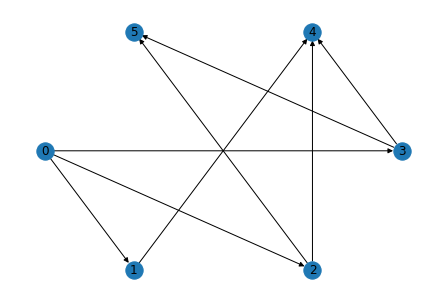

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

  
edges = [(0, 1), (0, 2), (0, 3), (1, 4), (2, 4), 
         (2, 5), (3, 4), (3, 5)]


G.add_edges_from(edges)
nx.draw_shell(G, with_labels = True)

In [ ]:
# [127] Topological Sorting
# Given a directed graph, a topological order of the graph nodes is defined as follow: For each directed edge A -> B in graph, A must before B in the order list.
# The first node in the order can be any node in the graph with no nodes direct to it. Find any topological order for the given graph.

class DirectedGraphNode:
    def __init__(self, x):
        self.label = x
        self.neighbors = []

def topo_sort(self, graph):    
    # 0. 统计每个点的入度, 并构建图(邻接表)
    node_to_indegree = self.get_indegree(graph)
    
    # 1. 建立 Queue (BFS) 和 Hashmap (去重): 将每个入度为0的点放入队列 Queue 中作为起点
    start_nodes = [n for n in graph if node_to_indegree[n] == 0]
    queue = collections.deque(start_nodes)

    # 记录拓扑顺序
    topo_order = []

    while queue:
        node = queue.popleft()
        topo_order.append(node)
        # 2. 遍历图上下一步可能路径(分层): 不断从队列中拿出一个点,去掉这个点的所有连边(指向其他点的边),其他点的相应入度-1
        for neighbor in node.neighbors:
            node_to_indegree[neighbor] -= 1
            
            # 3.  通过当前层节点拓展出下一层节点: 一旦发现新的入度为0的点, 丢回队列中
            if node_to_indegree[neighbor] == 0:
                queue.append(neighbor)
    return topo_order

def get_indegree(self, graph):
    # 初始化所有点的入度为 0
    node_to_indegree = {x: 0 for x in graph}

    for node in graph:
        # 所有邻居的入度 +1
        for neighbor in node.neighbors:
            node_to_indegree[neighbor] += 1

    return node_to_indegree


In [ ]:
# [605] Sequence Reconstruction (问拓扑排序是否唯一)
# Topological Sequences -> Graph -> Topological Sort

# Determine whether there is only one sequence that can be reconstructed from seqs and it is the org sequence

# Example 1:
# Input: org = [1, 2, 3], seq = [[1, 2], [1, 3]]
# Output: False
# Explanation:
# [1, 2, 3] is not the only reconstructible seq, another seq is [1, 3, 2]
# 
# Example 2:
# Input: org = [1, 2, 3], seq = [[1, 2]]
# Output: True
# Explanation:
# [1, 2] is the only reconstructible seq
# 
# Example 3:
# Input: org = [1, 2, 3], seq = [[1, 2], [1, 3], [2, 3]]
# Output: True
# Explanation:
# [1, 2, 3] is the only reconstructible seq
#

def sequence_reconstruction(self, org, seqs):
    # 0. 统计每个点的入度, 并构建图(邻接表) 
    graph = self.build_graph(seqs)
    indegrees = self.get_indegrees(graph)

    topo_order = self.topo_sort(graph, indegrees)
    return topo_order == org

def build_graph(self, seqs):
    # initialize graph
    graph = {}
    for seq in seqs:
        for node in seq:
            if node not in graph:
                graph[node] = set()
    for seq in seqs:
        for i in range(1, len(seq)):
            graph[seq[i-1]].add(seq[i])
    return graph

def get_indegrees(self, graph):
    indegrees = { node: 0 for node in graph }
    for node in graph:
        for neighbor in graph[node]:
            indegrees[neighbor] += 1
    return indegrees

def topo_sort(self, graph, indegrees): 
    # 1. 建立 Queue (BFS) 和 Hashmap (去重): 将每个入度为0的点放入队列 Queue 中作为起点 
    queue = []
    for node in graph:
        if indegrees[node] == 0:
            queue.append(node)
    
    topo_order = []
    while queue:
        # (*) 结束条件
        if len(queue) > 1:
            # there must exist more than one topo orders
            return None

        node = queue.pop()
        topo_order.append(node)

        # 2. 遍历图上下一步可能路径(分层): 不断从队列中拿出一个点,去掉这个点的所有连边(指向其他点的边),其他点的相应入度-1
        for neighbor in graph[node]:
            indegrees[neighbor] -= 1

            # 3.  通过当前层节点拓展出下一层节点: 一旦发现新的入度为0的点, 丢回队列中
            if indegrees[neighbor] == 0:
                queue.append(neighbor)
                
    if len(topo_order) == len(graph):
        return topo_order
    return None

In [ ]:
# [892] · Alien Dictionary 外星人字典 (求字典序最小的拓扑排序)
# There is a new alien language which uses the latin alphabet. However, the order among letters are unknown to you. 
# You receive a list of non-empty words from the dictionary, where words are sorted lexicographically by the rules of this new language.
# Derive the order of letters in this language.

# Example 1:
# Input: [“z”, "x"]
# Output: "zx"
# Explanation: 
#     从 "z" 和 "x"，我们可以得到 'z' < 'x' 所以返回"zx"
# 
# Example 2:
# Input:[“wrt”, “wrf”, “er”, “ett”, "rftt"]
# Output:"wertf"
# Explanation:
#     word: w   r   t
#                   ↓       # 从 “wrt”和“wrf”, 我们可以得到 't'<'f’ 
#     word: w   r   f
#           ↓               # 从 "wrt"和"er" ,我们可以得到'w'<'e’ 
#     word: e   r
#               ↓           # 从 "er"和"ett" ,我们可以得到 get 'r'<'t’
#     word: e   t   t
#           ↓               # 从 "ett"和"rftt" ,我们可以得到 'e'<'r’ 
#     word: r   f   t   t
# 
# Solution:
#            0   1   2
#     word1: a   b   c  
#            0   1   2   3
#     word2: a   b   e   f
#                    ↑
#                 index j: 第一个不 match 的 char
# 
#                word1[j]: c
#                    ↓
#                word2[j]: e
#     
#     graph: { word1[j]: [word2[j]), ] ,
#            }

def alien_order(self, words):
    # 0. 统计每个点的入度, 并构建图(邻接表)  
    graph = self.build_graph(words)
    indegrees = self.get_indegrees(graph)
    
    # 如果数据不合理, graph为空, 返回空字符串
    if not graph:
        return ""
    
    topo_order = self.topo_sort(graph, indegrees)
    return topo_order

def build_graph(self, words):
    # 存放(字母 -> 右面多个字母) 的映射关系
    graph = {}

    # 生成所有的点(char), 每个点的后续点暂时时为空
    for word in words:
        for c in word:
            if c not in graph:
                graph[c] = set()
    
    # 生成所有的边, 找一个点之后的点,并建立连接
    n = len(words)
    for i in range(n - 1):
        word1 = words[i]
        word2 = words[i + 1]
        for j in range(min(len(word1), len(word2))):
            if word1[j] != word2[j]:
                graph[word1[j]].add(word2[j])
                break
            # 如果输入 ["abc", "ab"], "abc"出现在"ab"前面, 不合法, 返回null ??
            if j == min(len(word1), len(word2)) - 1:
                if len(word1) > len(word2):
                    return None
    return graph

def get_indegrees(self, graph):
    indegreess = { node: 0 for node in graph }
    for node in graph:
        for neighbor in graph[node]:
            indegreess[neighbor] += 1
    return indegreess

def topo_sort(self, graph, indegrees):

    queue = [node for node in graph if indegrees[node] == 0]
    
    # 题目要求: 这里可能有多个有效的字母书序, 返回以正常字典顺序(a-z)看起来最小的
    # 所以这里要heapify, 从所有可以出对的元素中, 先出对字典序比较小的元素 
    import heapq
    heapq.heapify(queue)


    # 记录拓扑顺序(外星人字典排序)
    topo_order = ""

    while queue:
        node = heapq.heappop(queue)
        topo_order += node
        for neighbor in graph[node]:
            indegrees[neighbor] -= 1
            if indegrees[neighbor] == 0:
                heapq.heappush(queue, neighbor)
    
    return topo_order if len(topo_order) == len(graph) else ""

能用 BFS 的一定不要用 DFS(除非面试官特别要求)

# BFS 模板
1. 建立 Queue (BFS) 和 Hashmap (去重)
2. 遍历图上下一步可能路径(分层)
3. 通过当前层节点拓展出下一层节点
(*) 结束条件
(*) 剪枝不可达路径

## 有向图拓扑排序
0. 统计每个点的入度, 并构建图(邻接表)  
1. 建立 Queue (BFS) 和 Hashmap (去重)
   - 将每个入度为0的点放入队列 Queue 中作为起点 
2. 遍历图上下一步可能路径(分层):
   - 不断从队列中拿出一个点,去掉这个点的所有连边(指向其他点的边),其他点的相应入度-1
3. 通过当前层节点拓展出下一层节点
   - 一旦发现新的入度为0的点, 丢回队列中
(*) 结束条件
(*) 剪枝不可达路径
   

# BFS 的三个使用场景 
- 连通块问题
- 层级遍历问题 
- 拓扑排序问题

# 是否需要层级遍历
- 需要多一重循环

# 矩阵坐标变换数组
- deltaX, deltaY
- 是否在界内:isInBound / isValid


其他问题
图上的 BFS 
- 判断一个图是否是一棵树 
- 搜索图中最近值为target的点 
- 无向图连通块
矩阵上的 BFS 
- 僵尸多少天吃掉所有人 
- 建邮局问题 Build Post Office II